<a href="https://colab.research.google.com/github/sindoojapaladi/Data-science-course/blob/main/Copy_of_AlexaReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [ ]:
d=pd.read_table("/drive/My Drive/Colab Notebooks/amazon_alexa.tsv")

In [ ]:
d.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
d.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
d.shape

(3150, 5)

**1.COLUMNS**

In [ ]:
print(d.columns)

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [ ]:
d["rating"]

0       5
1       5
2       4
3       5
4       5
       ..
3145    5
3146    5
3147    5
3148    5
3149    4
Name: rating, Length: 3150, dtype: int64

In [ ]:
d['date']

0       31-Jul-18
1       31-Jul-18
2       31-Jul-18
3       31-Jul-18
4       31-Jul-18
          ...    
3145    30-Jul-18
3146    30-Jul-18
3147    30-Jul-18
3148    30-Jul-18
3149    29-Jul-18
Name: date, Length: 3150, dtype: object

In [ ]:
d["variation"]

0       Charcoal Fabric 
1       Charcoal Fabric 
2         Walnut Finish 
3       Charcoal Fabric 
4       Charcoal Fabric 
              ...       
3145          Black  Dot
3146          Black  Dot
3147          Black  Dot
3148          White  Dot
3149          Black  Dot
Name: variation, Length: 3150, dtype: object

In [ ]:
d["verified_reviews"]

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
d["feedback"]

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

**Analysis**

In [ ]:
d["feedback"].unique()

array([1, 0])

In [ ]:
d1=d[d["feedback"]==0]

Negative reviews

In [ ]:
d1["verified_reviews"]

46      It's like Siri, in fact, Siri answers more acc...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     Stopped working after 2 weeks ,didn't follow c...
176                                  Sad joke. Worthless.
                              ...                        
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3067    The only negative we have on this product is t...
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 257, dtype: object

**VISUALIZATION**

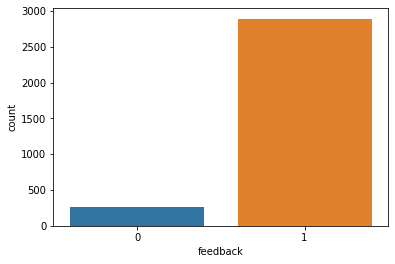

In [ ]:
sns.countplot(x=d["feedback"])

In [ ]:
d["rating"].unique()

array([5, 4, 3, 2, 1])

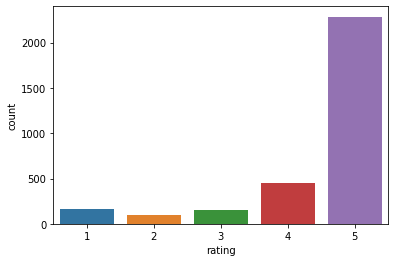

In [ ]:
sns.countplot(x=d["rating"])

(array([ 161.,   96.,  152.,  455., 2286.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

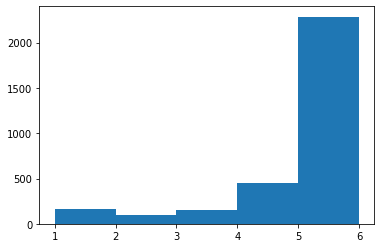

In [ ]:
plt.hist(d["rating"],bins=[1,2,3,4,5,6])


In [ ]:
d.groupby("rating").count()

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,96,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


In [ ]:
text=' '.join(d['verified_reviews'].tolist())

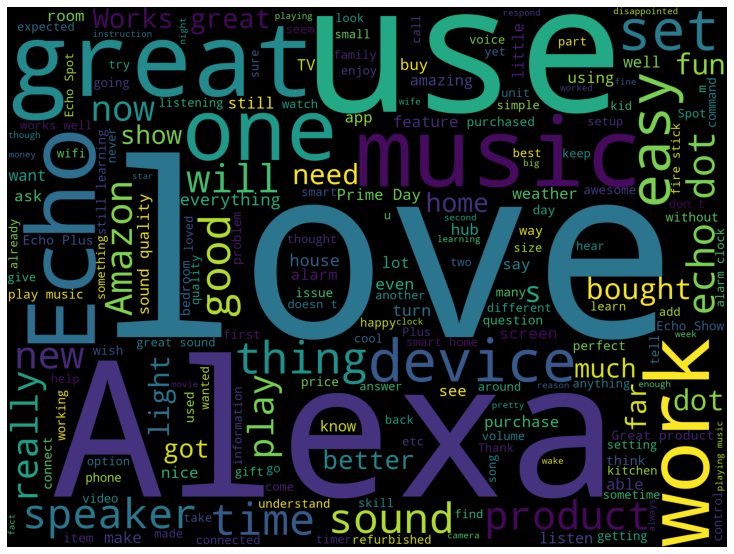

In [ ]:
wordcloud = WordCloud(width=2000,height=1500).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
reviews=d["verified_reviews"].values

In [ ]:
minLength=len(reviews[0])
maxLength=0
l=[]
for i in reviews:
  l.append(len(i))
  if len(i)<minLength:
    minLength=len(i)
    min=i
  if len(i)>maxLength: 
       maxLength=len(i)
       max=i
print("Minimum Length-",minLength,",Minimum Length review :",min,"\nMaximum Length-",maxLength,",Maximum Length review -",max)       

Minimum Length- 1 ,Minimum Length review : 😍 
Maximum Length- 2851 ,Maximum Length review - Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- 

In [ ]:
lengthOfReviews=pd.DataFrame(l)
lengthOfReviews.describe()#min max

,0
count,3150.000000
mean,132.049524
std,182.099952
min,1.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


In [ ]:
lengthOfReviews.columns=["reviewLength"]
lengthOfReviews

,reviewLength
0,13
1,9
2,195
3,172
4,5
...,...
3145,50
3146,135
3147,441
3148,380


(array([2.782e+03, 2.660e+02, 7.200e+01, 1.800e+01, 6.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.000e+00, 2.860e+02, 5.710e+02, 8.560e+02, 1.141e+03, 1.426e+03,
        1.711e+03, 1.996e+03, 2.281e+03, 2.566e+03, 2.851e+03]),
 <a list of 10 Patch objects>)

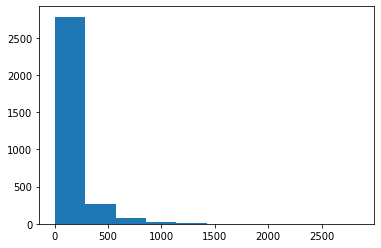

In [ ]:
plt.hist(lengthOfReviews.values)

In [ ]:
result=d.join(lengthOfReviews['reviewLength'])

In [ ]:
result #not in assignment  

,rating,date,variation,verified_reviews,feedback,reviewLength
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380
